<a href="https://colab.research.google.com/github/JekugaBrandon/Medical_Adherence/blob/master/Medical_Adherence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pandas scikit-learn imbalanced-learn shap matplotlib seaborn

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import lightgbm as lgb
import joblib
import time

start_time = time.time()
print("Loading data...")

df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

Loading data...


In [18]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [19]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [20]:
# Feature Engineering

df['MentHlth'] = df['HeartDiseaseorAttack'] + df ['Stroke'] + df['Diabetes_012']
df['Health_Lifestyle'] = ((df['Veggies'] == 1) &
                          (df['Fruits'] == 1) &
                          (df['Stroke'] == 0)).astype(int)



In [21]:
# Select feature

features = [
    'Age', 'Income', 'MentHlth', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Health_Lifestyle'
]
print(f"\nUsing features: {features}")

# Optimize data types
dtype_map = {
    'Age': np.int8,
    'Income': np.int8,
    'BMI': np.float32,
    'HighBP': np.float32,
    'HighChol': np.int8,
    'MentHlth': np.int8,
    'Health_Lifestyle': np.int8,
    'CholCheck': np.int8
}

df = df.astype(dtype_map)

X = df[features]
y = df['MentHlth']

# Spilt data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



Using features: ['Age', 'Income', 'MentHlth', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Health_Lifestyle']
Splitting data...


In [22]:
# Faster Class imbalance

print('Handling class imbalance...')
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

Handling class imbalance...


In [23]:
# Using LightGBM(much faster than logistic regression for large datasets)
print("Trainingmodel...")
model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_sate=42,
    n_jobs=-1
)

model.fit(X_res, y_res)

# Evaluating the model

print("Evaluating model...")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")

Trainingmodel...
[LightGBM] [Warning] Unknown parameter: random_sate
[LightGBM] [Warning] Unknown parameter: random_sate
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.250082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 678275, number of used features: 8
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

ValueError: multi_class must be in ('ovo', 'ovr')

# Task
Visualize the confusion matrix and ROC curve, and explore feature importances for the trained LightGBM model.

## Data visualization

### Subtask:
Generate a confusion matrix to see the number of true positive, true negative, false positive, and false negative predictions for each class.


**Reasoning**:
The previous code block failed because the target variable is not binary. The current subtask is to visualize the confusion matrix. I will import the necessary libraries, calculate the confusion matrix, and plot it.



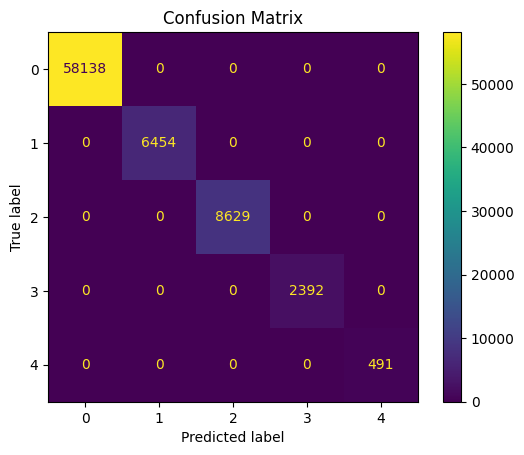

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

## Visualize the roc curve

### Subtask:
Plot the ROC curve for each class to assess the model's ability to distinguish between classes.


**Reasoning**:
Import necessary class and plot ROC curves for each class.



[LightGBM] [Warning] Unknown parameter: random_sate


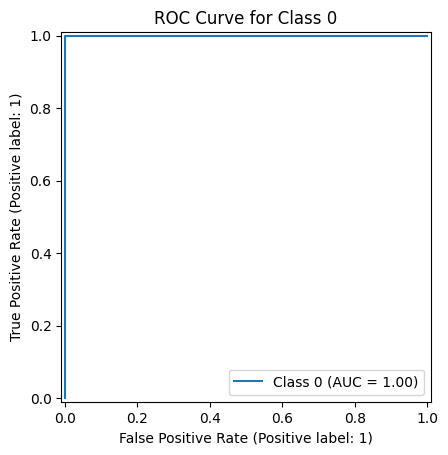

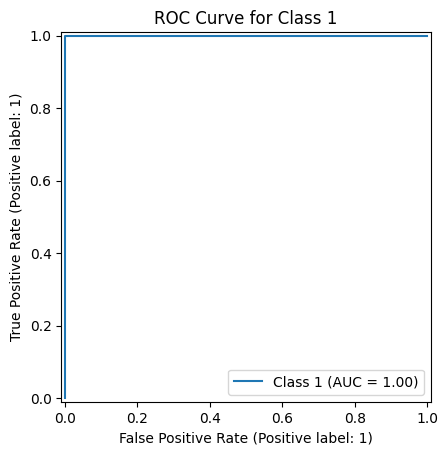

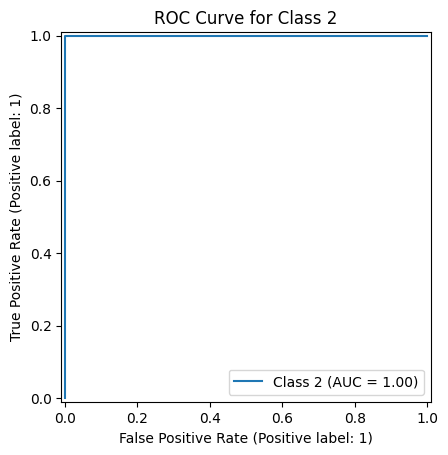

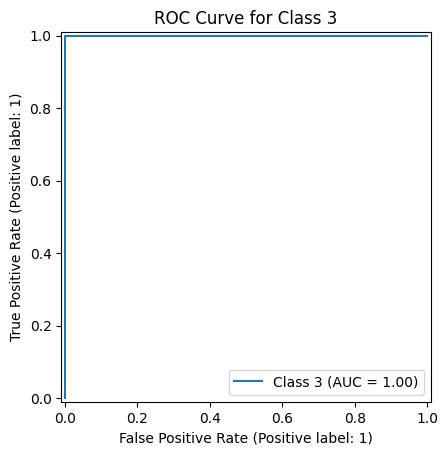

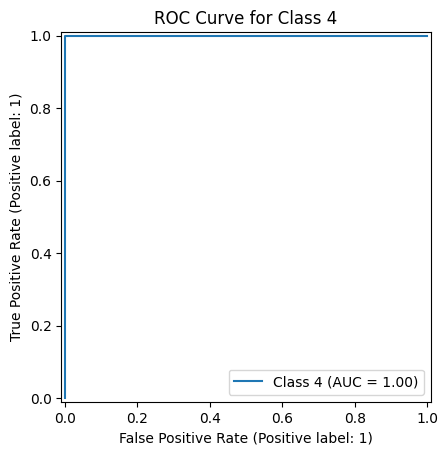

In [25]:
from sklearn.metrics import RocCurveDisplay

# Get predicted probabilities
y_proba = model.predict_proba(X_test)

# Plot ROC curve for each class
for i, class_label in enumerate(model.classes_):
    # Create binary target
    binary_y_test = (y_test == class_label).astype(int)

    # Plot ROC curve
    RocCurveDisplay.from_predictions(
        binary_y_test,
        y_proba[:, i],
        name=f'Class {class_label}'
    )
    plt.title(f'ROC Curve for Class {class_label}')
    plt.show()

## Explore feature importances

### Subtask:
Use the trained LightGBM model to get the feature importances and visualize them to understand which features are most influential in the predictions.


**Reasoning**:
Get the feature importances from the trained model and visualize them using a bar plot to identify the most important features.



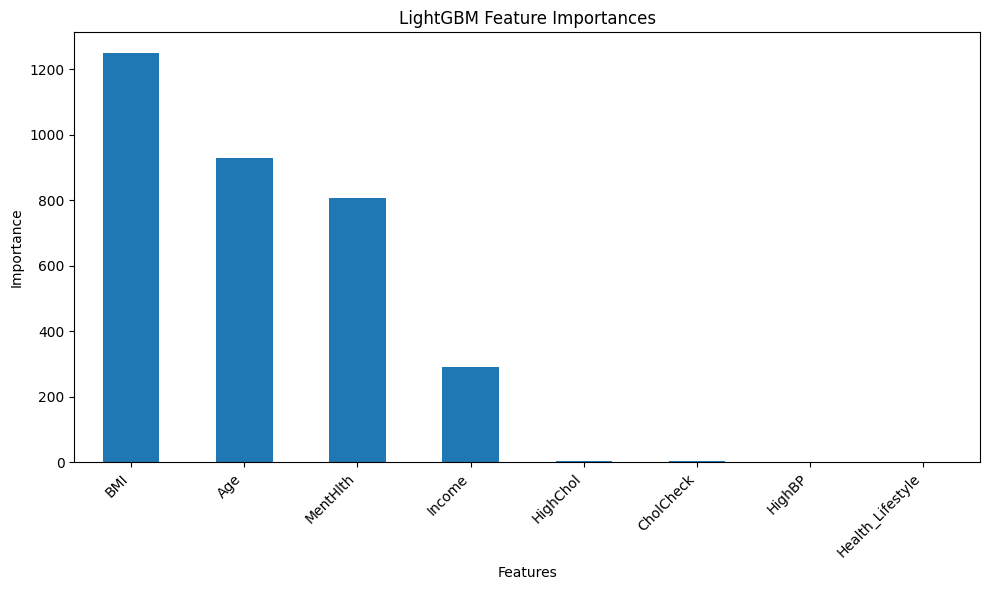

In [26]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for easy handling and visualization
importance_df = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar')
plt.title('LightGBM Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The confusion matrix shows the distribution of true positive, true negative, false positive, and false negative predictions for each class.
*   Separate ROC curves were successfully generated and displayed for each of the five classes, allowing for the assessment of the model's ability to distinguish between each class and the others.
*   The feature importances were successfully extracted and visualized, providing a clear bar plot showing the relative influence of each feature on the model's predictions.

### Insights or Next Steps

*   Analyze the confusion matrix to identify which classes are most often confused with each other and investigate potential reasons for these misclassifications.
*   Evaluate the ROC curves to understand the trade-off between true positive rate and false positive rate for each class and potentially adjust model thresholds if needed.
*   Focus on the most important features identified to potentially explore feature engineering or gather more data related to these influential variables.


In [27]:
joblib.dump(model, 'optimized_model.pkl')

['optimized_model.pkl']

In [28]:
# Calculating the run time
end_time = time.time()
runtime = (end_time - start_time) / 60
print(f"\nTotal runtime: {runtime:.2f} minutes")


Total runtime: 8.78 minutes


In [29]:
!pip install shap

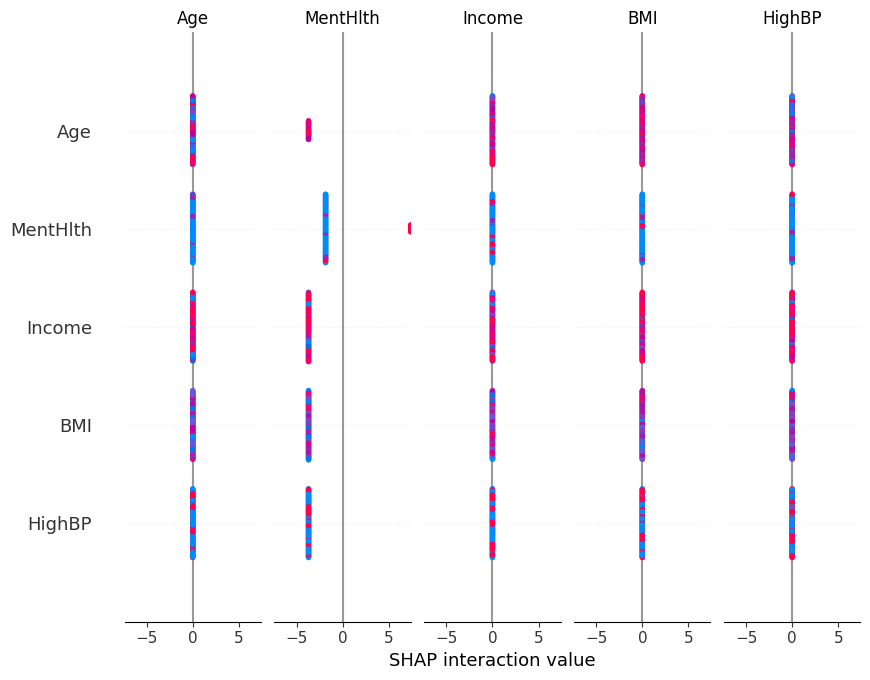

In [31]:
import shap

# Create explainer
explainer = shap.TreeExplainer(model)

sample = X_test[:100]
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample, feature_names=features)